In [1]:
import torch
from dpm.models import GaussianNaiveBayes
from dpm.visualize import plot_stats

In [2]:
y = torch.cat((torch.zeros(1000), torch.ones(2000))).view(-1, 1)
y.shape

torch.Size([3000, 1])

In [3]:
x = torch.cat((1 + 2.*torch.randn(1000, 10), -1 + 2.*torch.randn(2000, 10)), dim=0)
x.shape

torch.Size([3000, 10])

In [4]:
model = GaussianNaiveBayes()

In [5]:
model.log_prob(x, y)

tensor([-38.9675, -34.2991, -19.6909,  ..., -42.2247, -32.3961, -39.1357],
       grad_fn=<SumBackward2>)

In [6]:
stats = model.fit(x, y)

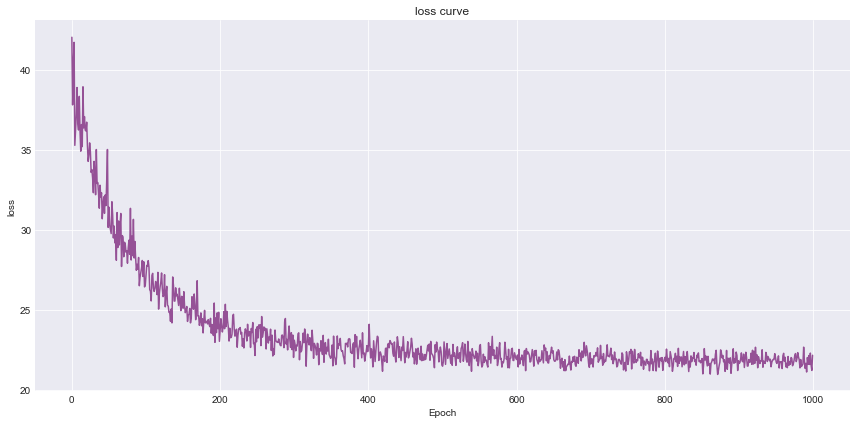

In [7]:
plot_stats(stats)

In [8]:
model.y_dist.probs

tensor([0.3535, 0.6465], grad_fn=<SoftmaxBackward>)

In [9]:
(model.predict(x) == y.long()).float().mean()

tensor(0.9543)

In [10]:
model.x_dist[0].loc

Parameter containing:
tensor([0.9343, 1.0378, 1.1077, 1.0276, 0.9316, 1.0085, 1.0108, 0.9962, 0.9408,
        1.0243], requires_grad=True)

In [11]:
model.x_dist[1].loc

Parameter containing:
tensor([-1.0341, -1.1064, -1.0572, -0.9518, -1.0112, -1.0296, -1.0571, -0.9720,
        -0.8666, -1.0333], requires_grad=True)

In [12]:
X = model.sample(5)
print(X)

tensor([[-1.5138, -0.7158, -3.1048, -2.3175, -2.5010, -0.5163, -0.1586, -0.2812,
         -1.6860, -0.9761],
        [ 0.5448, -3.9515, -3.4741, -2.5568,  0.5964, -3.8571, -2.9564,  0.9414,
          1.3406, -0.6520],
        [-3.0472,  2.5042, -0.6432,  0.9906,  0.6263, -0.1456,  1.4178, -0.7487,
         -1.3284, -0.9819],
        [-0.4793,  1.0385, -1.4785, -2.3855,  1.9141,  0.5981,  0.8177, -2.8576,
         -0.1141, -5.7024],
        [ 2.8669,  2.2255, -2.1519,  0.0286,  2.4388,  1.5980, -0.0870, -2.2094,
          0.6564,  4.3509]], grad_fn=<IndexBackward>)


In [13]:
model.predict(X)

tensor([[1],
        [1],
        [1],
        [1],
        [0]])